<a href="https://colab.research.google.com/github/bhar-gav/machine_learning/blob/main/perceptron_learning_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

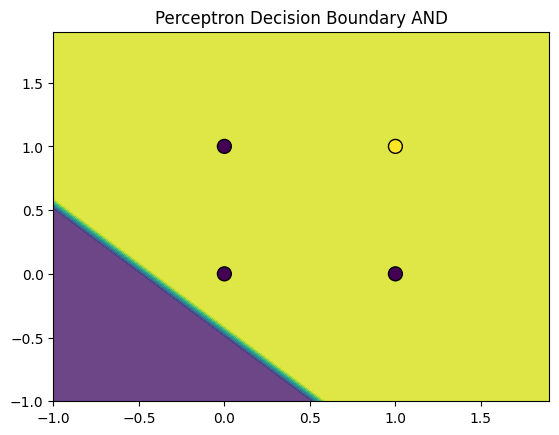

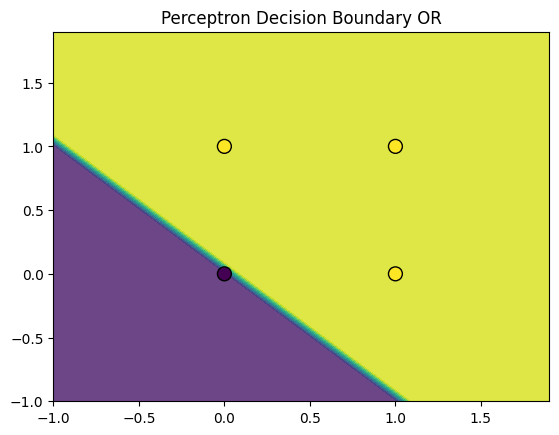

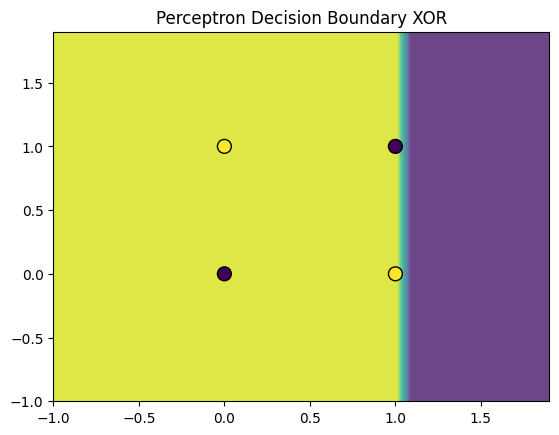

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def generate_data(dataset_type):
    if dataset_type == 'OR':
        return np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 1]), dataset_type
    elif dataset_type == 'AND':
        return np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 0, 0, 1]), dataset_type
    elif dataset_type == 'XOR':
        return np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 0]), dataset_type

# Perceptron learning
def perceptron(X, y, eta=0.1, epochs=100):

    weights = np.zeros(X.shape[1])
    bias = 0

    for epoch in range(epochs):
        for i in range(len(X)):
            prediction = np.sign(np.dot(X[i], weights) + bias)
            if prediction != y[i]:
                weights += eta * (y[i] - prediction) * X[i]
                bias += eta * (y[i] - prediction)

    return weights, bias

# Test and decision boundary
def plot_decision_boundary(X, y, weights, bias):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = np.sign(np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
    plt.title("Perceptron Decision Boundary {}".format(dataset_type))
    plt.show()


X, y ,dataset_type = generate_data('AND')
weights, bias = perceptron(X, y)
plot_decision_boundary(X, y, weights, bias)

X, y, dataset_type = generate_data('OR')
weights, bias = perceptron(X, y)
plot_decision_boundary(X, y, weights, bias)

X, y, dataset_type = generate_data('XOR')
weights, bias = perceptron(X, y)
plot_decision_boundary(X, y, weights, bias)


OR Data: Accuracy: 1.0
AND Data: Accuracy: 1.0
XOR Data: Accuracy: 0.5


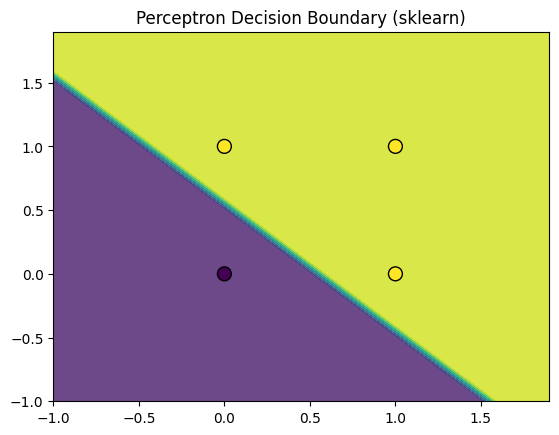

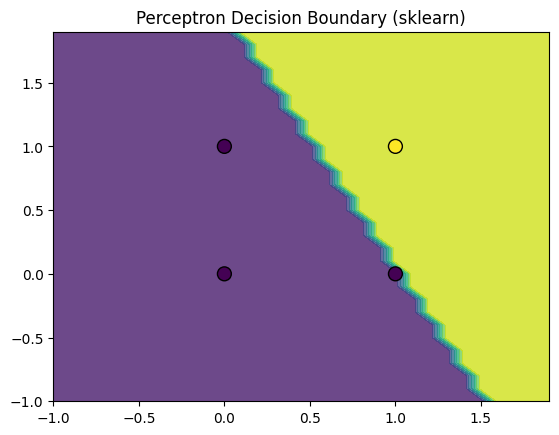

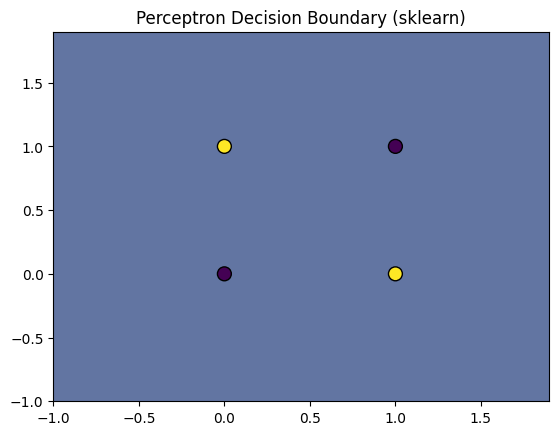

In [3]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

def generate_data(dataset_type):
    if dataset_type == 'OR':
        return np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 1])
    elif dataset_type == 'AND':
        return np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 0, 0, 1])
    elif dataset_type == 'XOR':
        return np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 0])


X_or, y_or = generate_data('OR')
X_and, y_and = generate_data('AND')
X_xor, y_xor = generate_data('XOR')


def train_perceptron(X, y):
    model = Perceptron(max_iter=1000, eta0=0.1)
    model.fit(X, y)
    return model


model_or = train_perceptron(X_or, y_or)
print("OR Data: Accuracy:", model_or.score(X_or, y_or))

model_and = train_perceptron(X_and, y_and)
print("AND Data: Accuracy:", model_and.score(X_and, y_and))

model_xor = train_perceptron(X_xor, y_xor)
print("XOR Data: Accuracy:", model_xor.score(X_xor, y_xor))

def plot_decision_boundary_sklearn(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
    plt.title("Perceptron Decision Boundary (sklearn)")
    plt.show()


plot_decision_boundary_sklearn(model_or, X_or, y_or)

plot_decision_boundary_sklearn(model_and, X_and, y_and)

plot_decision_boundary_sklearn(model_xor, X_xor, y_xor)


**MNIST dataset**

---



In [14]:
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

mnist, info = tfds.load('mnist', with_info=True, as_supervised=True)


In [15]:
X, y = [], []

for image, label in mnist['train']:
    X.append(np.array(image, dtype=np.float32))
    y.append(label.numpy())


X = np.array(X)
y = np.array(y)

#range [0,1]
X = X / 255.0

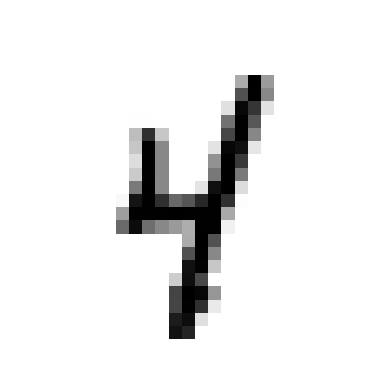

In [16]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    plt.imshow(image_data, cmap="binary")
    plt.axis("off")

# First digit from X
some_digit = X[0]
plot_digit(some_digit)

plt.show()


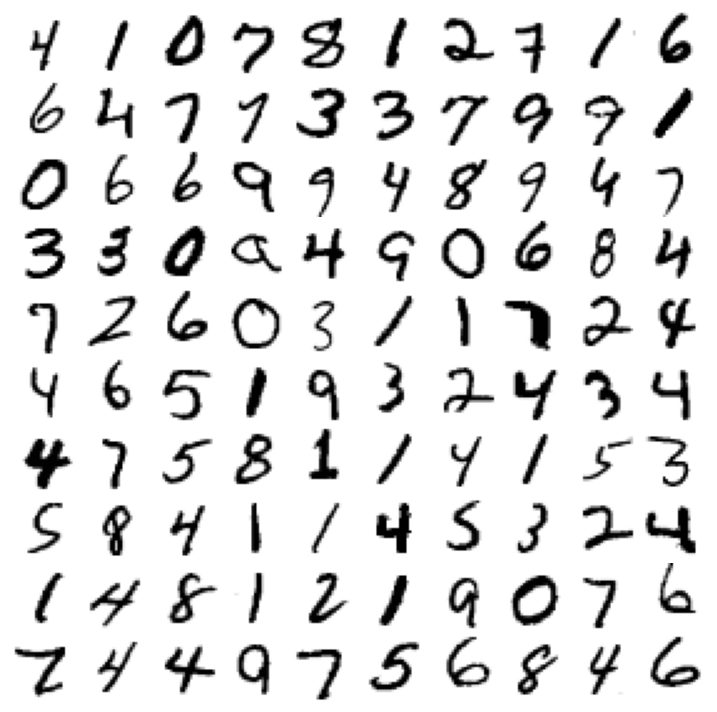

In [17]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    plt.imshow(image_data, cmap="binary")
    plt.axis("off")

# 1first 100 digits
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)


plt.subplots_adjust(wspace=0, hspace=0)

plt.show()


In [18]:
mnist.keys()

dict_keys(['test', 'train'])

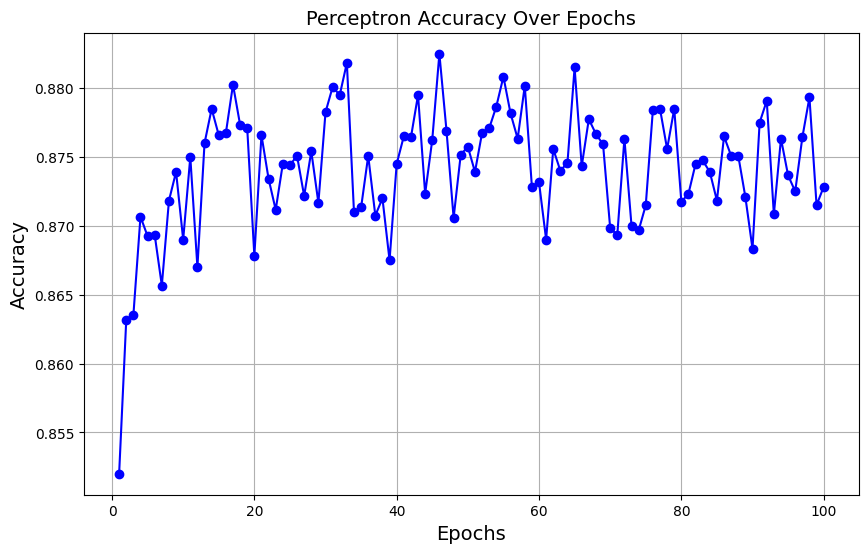

Final Perceptron Accuracy on Test Set: 0.8728333333333333


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(X.shape[0], -1), y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Perceptron(max_iter=1, eta0=0.1, warm_start=True)

accuracies = []
epochs = 100

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

for epoch in range(epochs):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)


plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), accuracies, marker='o', linestyle='-', color='b')
plt.title('Perceptron Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


print("Final Perceptron Accuracy on Test Set:", accuracies[-1])
